In [1]:
ls

 驱动器 C 中的卷是 Windows 
 卷的序列号是 AAAB-C89A

 C:\Users\12453\Desktop\work\syn 的目录

2024/11/04  18:42    <DIR>          .
2024/11/04  18:13    <DIR>          ..
2024/11/04  18:40    <DIR>          .ipynb_checkpoints
2024/11/04  18:32       264,994,380 intensity_ic_aniso_ma0.8_Dz1e28_d5kpc_phi60.dat
2024/11/04  18:34       264,994,380 intensity_syn_aniso_ma0.8_Dz1e28_d5kpc_phi60.dat
2024/11/04  18:42               617 Untitled.ipynb
               3 个文件    529,989,377 字节
               3 个目录 311,212,445,696 可用字节


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import constants as const
from astropy import units as u

NumTheta = 301
NumZeta = 180
NumNu = 201
rmax = 1000
dpul = 5000
theta = np.arcsin(rmax / dpul) * np.linspace(0,1,NumTheta,endpoint=True) + 1e-10
zeta = np.linspace(0, 2*np.pi, NumZeta, endpoint=False  )
nu = np.logspace(10, 30, NumNu, endpoint=True)
erg = (const.h * nu / u.s).to(u.erg).value
eV = (const.h * nu / u.s).to(u.eV)
ma_lst = [0.2, 0.5, 0.8]
phi_lst = [10, 30, 60]
# itst_syn = np.loadtxt("intensity_syn_aniso_ma0.8_Dz1e28_d5kpc_phi60.dat")
# itst_ic = np.loadtxt("intensity_ic_aniso_ma0.8_Dz1e28_d5kpc_phi60.dat")
# itst_syn = itst_syn.reshape(NumTheta, NumZeta, NumNu)
# itst_ic = itst_ic.reshape(NumTheta, NumZeta, NumNu)


In [4]:
itst_syn.shape

(301, 180, 201)

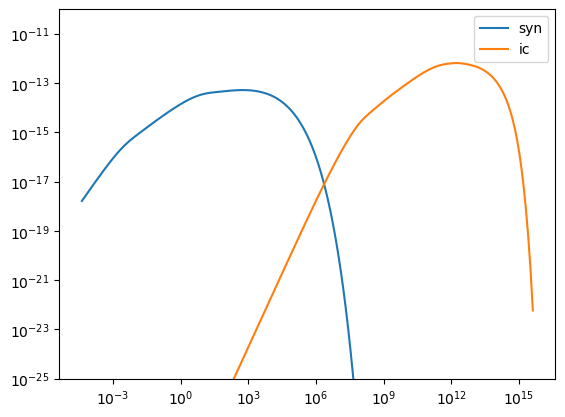

In [33]:

temp_syn = np.sum(itst_syn*theta[:,None,None]*np.diff(theta)[0]*np.diff(zeta)[0], axis=0)
temp_ic = np.sum(itst_ic*theta[:,None,None]*np.diff(theta)[0]*np.diff(zeta)[0], axis=0)
e2dnde_syn = np.sum(temp_syn, axis=0)
e2dnde_ic = np.sum(temp_ic, axis=0)
plt.plot(eV, e2dnde_syn,label="syn")
plt.plot(eV, e2dnde_ic,label="ic")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-25,1e-10)
plt.legend()

In [34]:
itst_syn_phi30 = np.loadtxt("intensity_syn_aniso_ma0.8_Dz1e28_d5kpc_phi30.dat")
itst_ic_phi30 = np.loadtxt("intensity_ic_aniso_ma0.8_Dz1e28_d5kpc_phi30.dat")
itst_syn_phi30 = itst_syn_phi30.reshape(NumTheta, NumZeta, NumNu)
itst_ic_phi30 = itst_ic_phi30.reshape(NumTheta, NumZeta, NumNu)

In [37]:
itst_syn_phi10 = np.loadtxt("intensity_syn_aniso_ma0.8_Dz1e28_d5kpc_phi10.dat")
itst_ic_phi10 = np.loadtxt("intensity_ic_aniso_ma0.8_Dz1e28_d5kpc_phi10.dat")
itst_syn_phi10 = itst_syn_phi10.reshape(NumTheta, NumZeta, NumNu)
itst_ic_phi10 = itst_ic_phi10.reshape(NumTheta, NumZeta, NumNu)

Text(0, 0.5, '$\\rm E^2dN/dE \\quad [erg \\, cm^{-2} \\, s^{-1}]$')

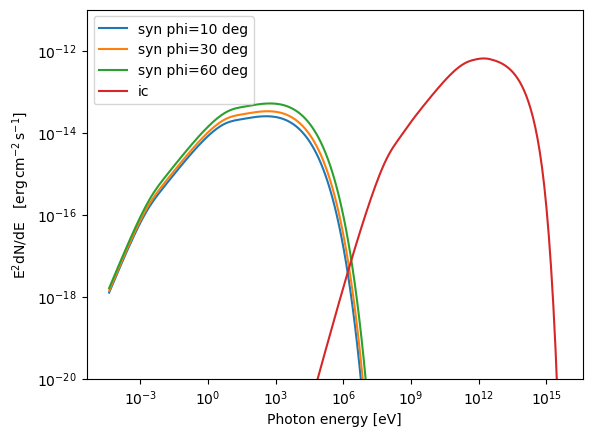

In [49]:
temp_syn_phi30 = np.sum(itst_syn_phi30*theta[:,None,None]*np.diff(theta)[0]*np.diff(zeta)[0], axis=0)
temp_ic_phi30 = np.sum(itst_ic_phi30*theta[:,None,None]*np.diff(theta)[0]*np.diff(zeta)[0], axis=0)
e2dnde_syn_phi30 = np.sum(temp_syn_phi30, axis=0)
e2dnde_ic_phi30 = np.sum(temp_ic_phi30, axis=0)
temp_syn_phi10 = np.sum(itst_syn_phi10*theta[:,None,None]*np.diff(theta)[0]*np.diff(zeta)[0], axis=0)
temp_ic_phi10 = np.sum(itst_ic_phi10*theta[:,None,None]*np.diff(theta)[0]*np.diff(zeta)[0], axis=0)
e2dnde_syn_phi10 = np.sum(temp_syn_phi10, axis=0)
e2dnde_ic_phi10 = np.sum(temp_ic_phi10, axis=0)
plt.plot(eV, e2dnde_syn_phi10,label=r"syn phi=10 deg")
plt.plot(eV, e2dnde_syn_phi30,label="syn phi=30 deg")
# plt.plot(eV, e2dnde_ic_phi30,label="ic phi30")
plt.plot(eV, e2dnde_syn,label="syn phi=60 deg")
# plt.plot(eV, e2dnde_ic_phi10,label="ic phi10")
plt.plot(eV, e2dnde_ic,label="ic")

plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-20,1e-11)
plt.legend()
plt.xlabel("Photon energy [eV]")
plt.ylabel(r"$\rm E^2dN/dE \quad [erg \, cm^{-2} \, s^{-1}]$")
# plt.savefig("MA0.8.pdf",format="pdf")

In [22]:
np.max(itst_syn)

2.897564859846984e-30

In [3]:
itst_syn = np.loadtxt("intensity_syn.dat")
itst_ic = np.loadtxt("intensity_ic.dat")
itst_syn = itst_syn.reshape(NumTheta, NumZeta, NumNu)
itst_ic = itst_ic.reshape(NumTheta, NumZeta, NumNu)
temp_syn = np.sum(itst_syn*theta[:,None,None]*np.diff(theta)[0]*np.diff(zeta)[0], axis=0)
temp_ic = np.sum(itst_ic*theta[:,None,None]*np.diff(theta)[0]*np.diff(zeta)[0], axis=0)
e2dnde_syn = np.sum(temp_syn, axis=0)
e2dnde_ic = np.sum(temp_ic, axis=0)

Text(0, 0.5, '$\\rm E^2dN/dE \\quad [erg \\, cm^{-2} \\, s^{-1}]$')

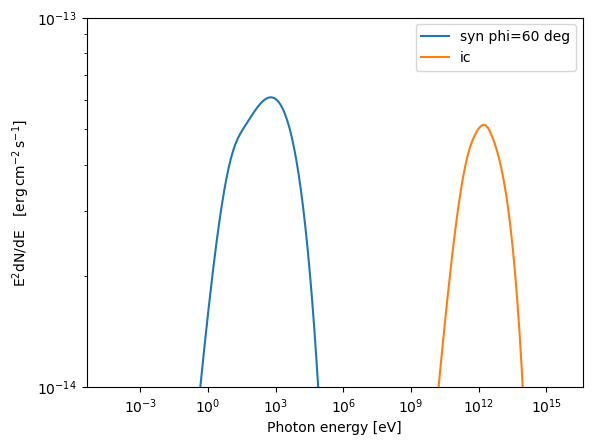

In [13]:
plt.plot(eV, e2dnde_syn,label=r"syn phi=60 deg")
plt.plot(eV, e2dnde_ic/4/3.14,label="ic")

plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-14,1e-13)
plt.legend()
plt.xlabel("Photon energy [eV]")
plt.ylabel(r"$\rm E^2dN/dE \quad [erg \, cm^{-2} \, s^{-1}]$")
# plt.savefig("MA0.8.pdf",format="pdf")

In [2]:
e2dnde_syn = np.zeros((3,3,NumNu))
e2dnde_ic = np.zeros((3,3,NumNu))

for i in range(3):
    ma = ma_lst[i]
    for j in range(3):
        phi = phi_lst[j]
        itst_syn = np.loadtxt("intensity_syn_aniso_ma"+str(ma)+"_Dz1e28_d5kpc_phi"+str(phi)+".dat")
        itst_ic = np.loadtxt("intensity_ic_aniso_ma"+str(ma)+"_Dz1e28_d5kpc_phi"+str(phi)+".dat")
        itst_syn = itst_syn.reshape(NumTheta, NumZeta, NumNu)
        itst_ic = itst_ic.reshape(NumTheta, NumZeta, NumNu)
        temp_syn = np.sum(itst_syn*theta[:,None,None]*np.diff(theta)[0]*np.diff(zeta)[0], axis=0)
        temp_ic = np.sum(itst_ic*theta[:,None,None]*np.diff(theta)[0]*np.diff(zeta)[0], axis=0)
        e2dnde_syn[i,j] = np.sum(temp_syn, axis=0)
        e2dnde_ic[i,j] = np.sum(temp_ic, axis=0)
e2dnde_ic = (5/1.6)**2*e2dnde_ic / 4/ 3.14   # transform distance from 5 kpc to 2 kpc
e2dnde_syn = (5/1.6)**2*e2dnde_syn           # transform distance from 5 kpc to 2 kpc

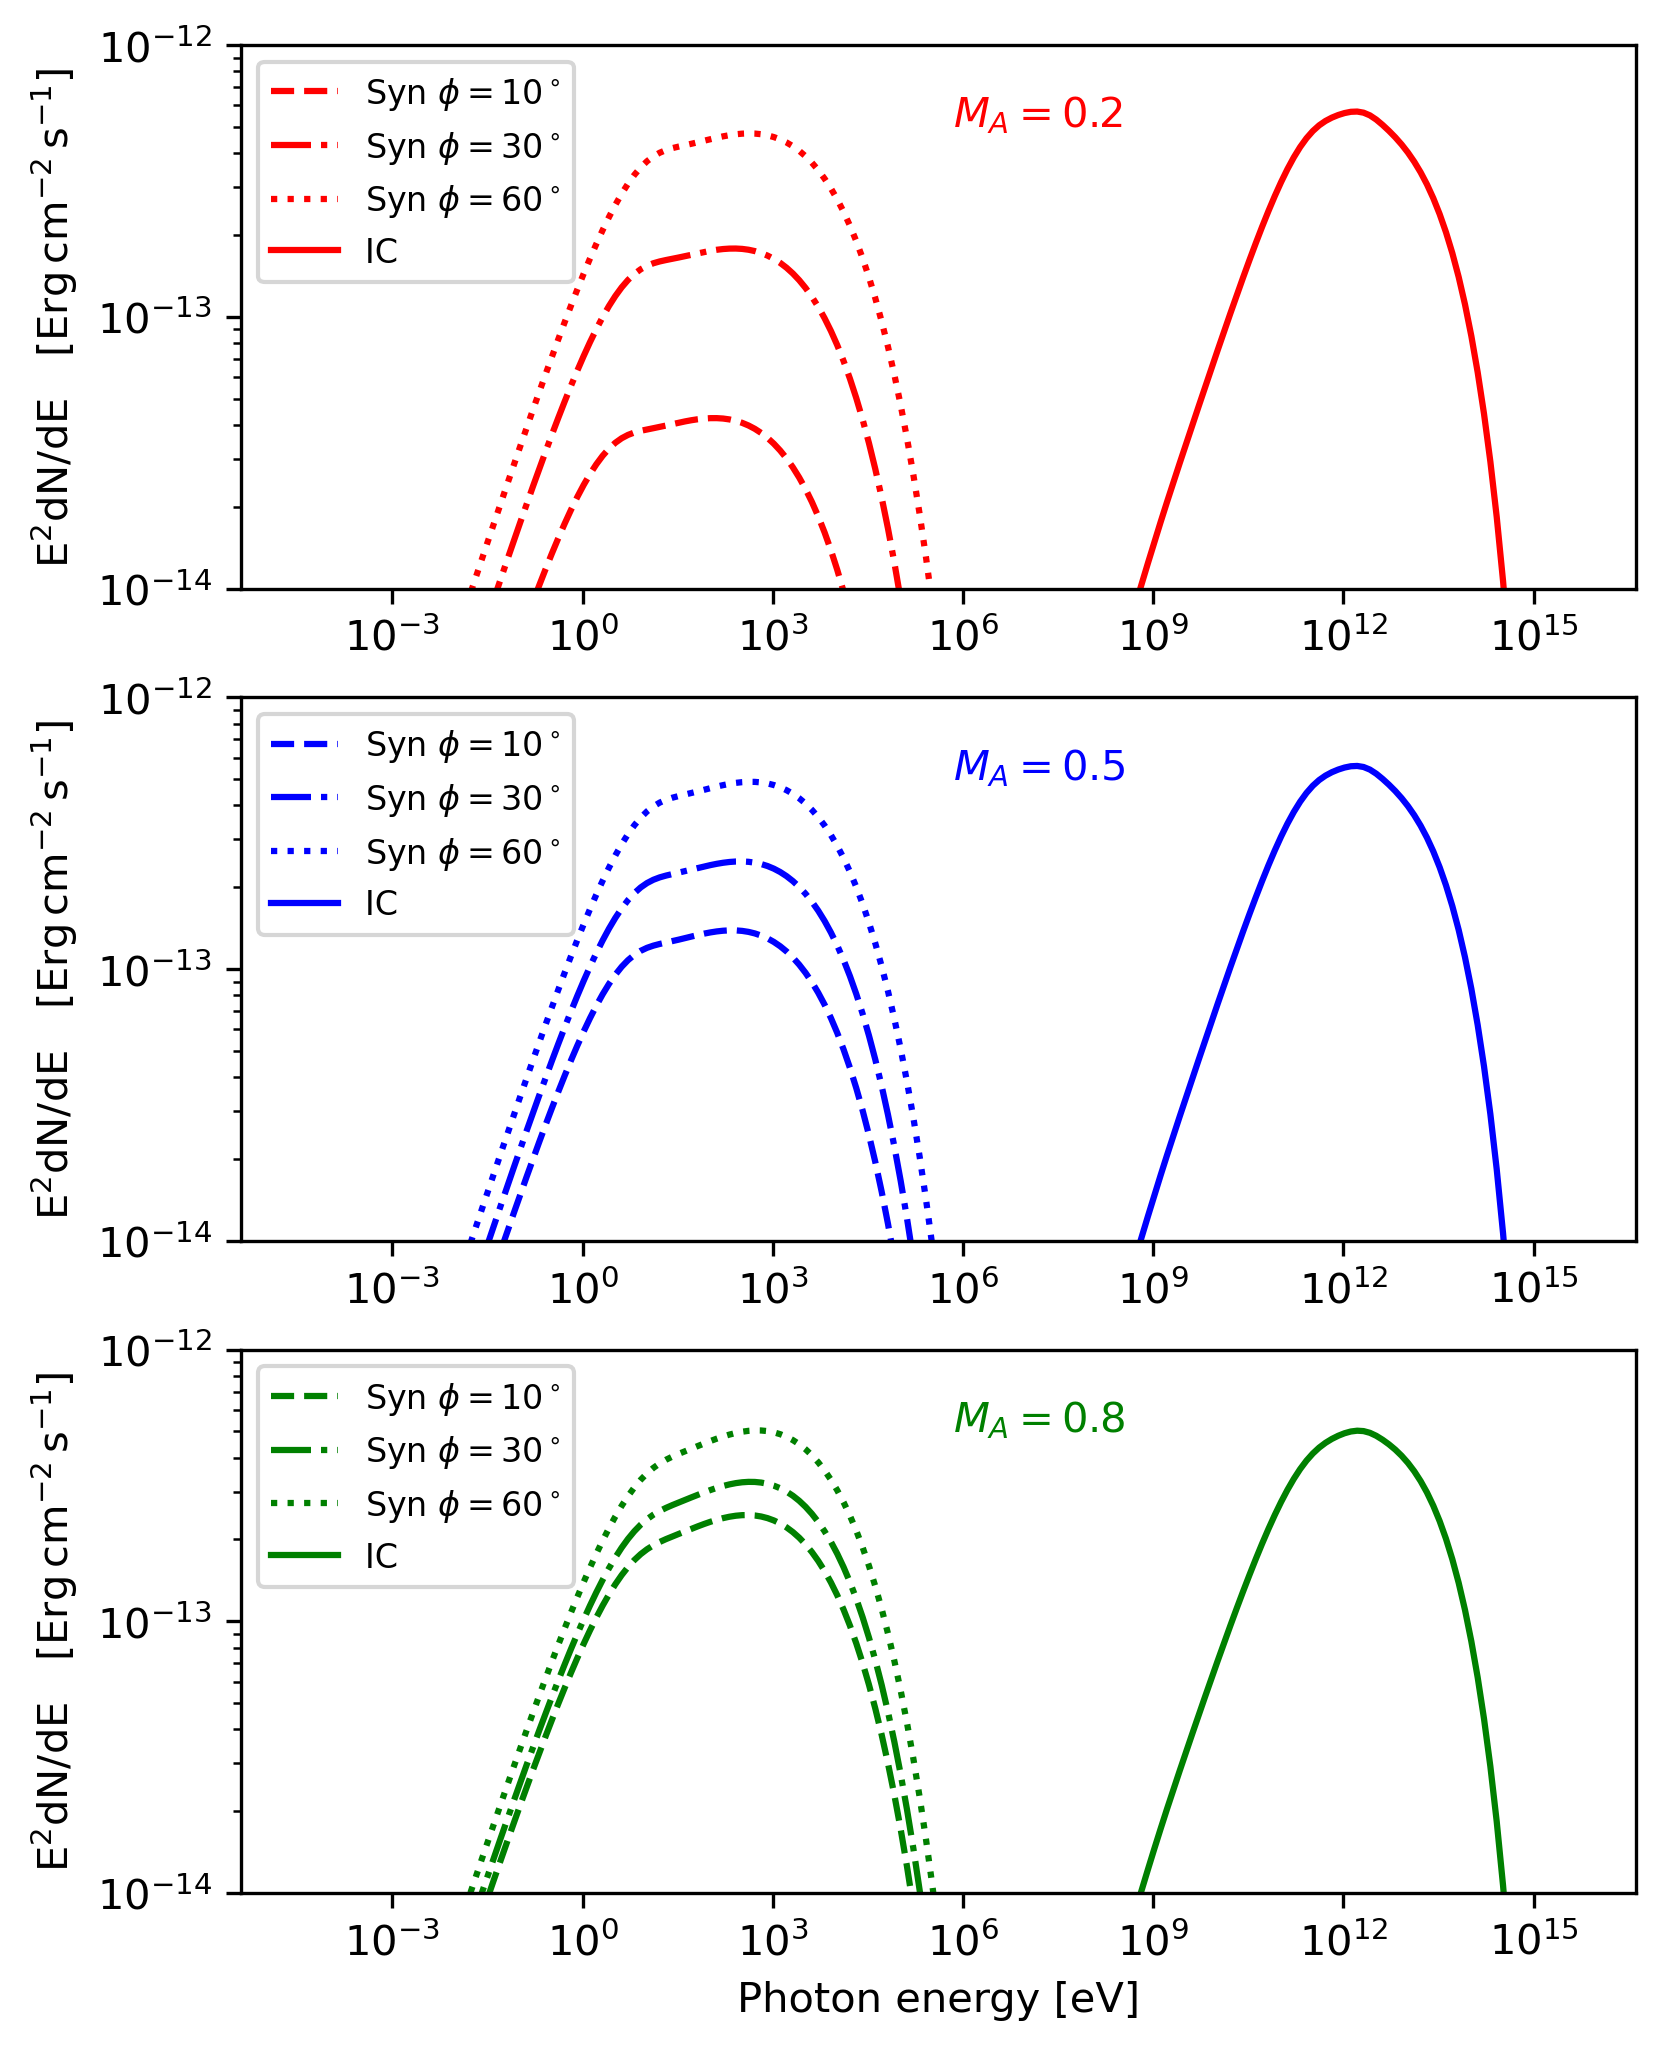

In [6]:

s = 200
ft = 10
font = {"family":"serif","size":ft}

fig, (ax1,ax2,ax3) = plt.subplots(3,1,sharex=False, sharey=False,figsize=(6,8),dpi=300)
ax1.plot(eV, e2dnde_syn[0,0],color="red",linestyle="--",label=r"Syn $\phi=10^\circ$")
ax1.plot(eV, e2dnde_syn[0,1],color="red",linestyle="-.",label=r"Syn $\phi=30^\circ$")
ax1.plot(eV, e2dnde_syn[0,2],color="red",linestyle=":",label=r"Syn $\phi=60^\circ$")
# ax1.plot(eV, e2dnde_ic[0,0],color="red",linestyle="-",label="IC ")
ax1.plot(eV, e2dnde_ic[0,1],color="red",linestyle="-",label="IC ")
# ax1.plot(eV, e2dnde_ic[0,2],color="red",linestyle="-",label="IC ")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim(1e-14,1e-12)
ax1.set_ylabel(r"$\rm E^2dN/dE \quad [Erg \, cm^{-2} \, s^{-1}]$",font)
ax1.legend(fontsize=8)
ax1.text(7e5,5e-13, r"$M_A=0.2$",color="red",fontsize=10)

ax2.plot(eV, e2dnde_syn[1,0],color="blue",linestyle="--",label=r"Syn $\phi=10^\circ$")
ax2.plot(eV, e2dnde_syn[1,1],color="blue",linestyle="-.",label=r"Syn $\phi=30^\circ$")
ax2.plot(eV, e2dnde_syn[1,2],color="blue",linestyle=":",label=r"Syn $\phi=60^\circ$")
# ax2.plot(eV, e2dnde_ic[1,0],color="blue",linestyle="-",label="IC ")
ax2.plot(eV, e2dnde_ic[1,1],color="blue",linestyle="-",label="IC ")
# ax2.plot(eV, e2dnde_ic[1,2],color="blue",linestyle="-",label="IC ")

ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(1e-14,1e-12)
ax2.set_ylabel(r"$\rm E^2dN/dE \quad [Erg \, cm^{-2} \, s^{-1}]$",font)
ax2.legend(fontsize=8)
ax2.text(7e5,5e-13, r"$ M_A=0.5$",color="blue",fontsize=10)

ax3.plot(eV, e2dnde_syn[2,0],color="green",linestyle="--",label=r"Syn $\phi=10^\circ$")
ax3.plot(eV, e2dnde_syn[2,1],color="green",linestyle="-.",label=r"Syn $\phi=30^\circ$")
ax3.plot(eV, e2dnde_syn[2,2],color="green",linestyle=":",label=r"Syn $\phi=60^\circ$")
# ax3.plot(eV, e2dnde_ic[2,0],color="green",linestyle="-",label="IC ")
ax3.plot(eV, e2dnde_ic[2,1],color="green",linestyle="-",label="IC ")
# ax3.plot(eV, e2dnde_ic[2,2],color="green",linestyle="-",label="IC ")

ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_ylim(1e-14,1e-12)
ax3.set_ylabel(r"$\rm E^2dN/dE \quad [Erg \, cm^{-2} \, s^{-1}]$",font)
ax3.set_xlabel("Photon energy [eV]")
ax3.legend(fontsize=8)
ax3.text(7e5,5e-13, r"$ M_A=0.8$",color="green",fontsize=10)
# plt.savefig("Syn.eps",format="eps",bbox_inches="tight")
plt.savefig("Syn.pdf",format="pdf",bbox_inches="tight")

In [14]:
for i in range(3):
    for j in range(3):
        if i == 0 and j == 0:
            pass
        else:
            print(np.max((e2dnde_ic[0,0] - e2dnde_ic[i,j]) / e2dnde_ic[0,0]))

-0.00019450099080073704
0.014646615908594241
0.015628014565266447
0.02054002557056673
0.03325984092576972
0.13958772002768238
0.1412736574453364
0.14537978681840882


In [12]:
np.max((e2dnde_ic[0,0] - e2dnde_ic[1,1]) / e2dnde_ic[0,0])

0.02054002557056673

In [15]:
ls *2kpc*

 驱动器 C 中的卷是 Windows 
 卷的序列号是 AAAB-C89A

 C:\Users\12453\Desktop\work\syn 的目录

2024/11/07  21:06       264,994,380 intensity_ic_aniso_ma0.8_Dz1e28_d2kpc_phi60.dat
2024/11/07  21:04       264,994,380 intensity_syn_aniso_ma0.8_Dz1e28_d2kpc_phi60.dat
               2 个文件    529,988,760 字节
               0 个目录 303,142,805,504 可用字节


In [23]:
itst_syn_d2 = np.loadtxt("intensity_syn_aniso_ma0.8_Dz1e28_d2kpc_phi60.dat")
itst_ic_d2 = np.loadtxt("intensity_ic_aniso_ma0.8_Dz1e28_d2kpc_phi60.dat")
itst_syn_d2 = itst_syn_d2.reshape(NumTheta, NumZeta, NumNu)
itst_ic_d2 = itst_ic_d2.reshape(NumTheta, NumZeta, NumNu)
theta_d2 = np.arcsin(rmax / 2000) * np.linspace(0,1,NumTheta,endpoint=True) + 1e-10

temp_syn_d2 = np.sum(itst_syn_d2*theta_d2[:,None,None]*np.diff(theta_d2)[0]*np.diff(zeta)[0], axis=0)
temp_ic_d2 = np.sum(itst_ic_d2*theta_d2[:,None,None]*np.diff(theta_d2)[0]*np.diff(zeta)[0], axis=0)
e2dnde_syn_d2 = np.sum(temp_syn_d2, axis=0)
e2dnde_ic_d2 = np.sum(temp_ic_d2, axis=0)
e2dnde_ic_d2 = e2dnde_ic_d2 / 4 / 3.14

Text(0, 0.5, '$\\rm E^2dN/dE \\quad [erg \\, cm^{-2} \\, s^{-1}]$')

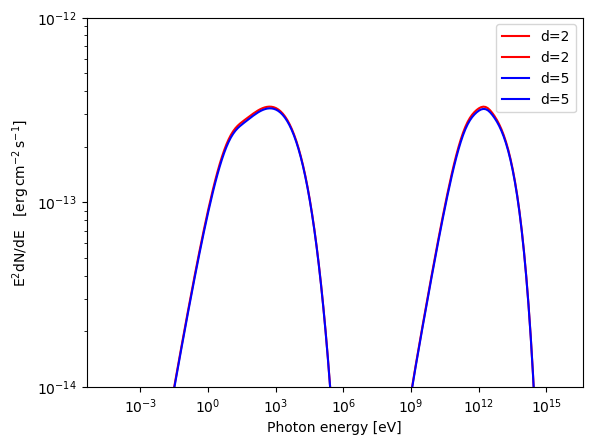

In [27]:
plt.plot(eV, e2dnde_syn_d2,label=r"d=2",color="red")
plt.plot(eV, e2dnde_ic_d2,label="d=2",color="red")
plt.plot(eV, e2dnde_syn[2,2]*2.5**2,label=r"d=5",color="blue")
plt.plot(eV, e2dnde_ic[2,2]*2.5**2,label="d=5",color="blue")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-14,1e-12)
plt.legend()
plt.xlabel("Photon energy [eV]")
plt.ylabel(r"$\rm E^2dN/dE \quad [erg \, cm^{-2} \, s^{-1}]$")
# plt.savefig("MA0.8.pdf",format="pdf")

In [28]:
2.5**2

6.25

In [4]:
(2 / 1.6)**2

1.5625

In [8]:
5e8 *0.511e6 / 1e12

255.5

In [10]:
(1.5e-53)**0.5

3.872983346207417e-27